# Implementaion without in-built libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


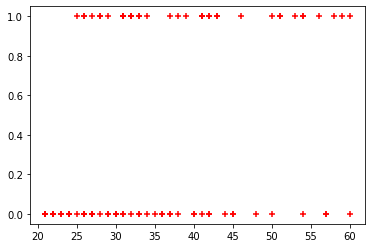

In [5]:
plt.scatter(df['Age'], df['Outcome'], marker = '+', color = 'r')

In [6]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def fit(self, X, Y):
        self.m, self.n = X.shape               
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
        
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
        
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
                 
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
           
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )    
        return Y

In [7]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0 )
model = LogisticRegression( learning_rate = 0.01, iterations = 1000 )
model.fit( X_train, Y_train )

In [9]:
Y_pred = model.predict( X_test )
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
correctly_classified = 0
count = 0    
for count in range( np.size( Y_pred ) ) :         
    if Y_test[count] == Y_pred[count] :            
        correctly_classified = correctly_classified + 1
        count = count + 1

In [11]:
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )

Accuracy on test set by our model       :   61.904761904761905


# Implementation with libraries

In [12]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

C:\Users\SantoshKumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SantoshKumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
predicted = model1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print('misclassified values : ', (Y_test != predicted).sum())

misclassified values :  234


In [16]:
accuracy_score = accuracy_score(Y_test, predicted)
print(accuracy_score)

0.6363636363636364
